In [1]:
import os
import sys
import wrf
import math
import cmaps
import time
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

cappi lev:  [  500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500  6000
  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000]


<ipython-input-41-74d413863e5e>:39: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shadow = ax1.pcolormesh(lon, lat, dbz_cappi, cmap=cmap, norm=norm)#, transform=ccrs.PlateCarree())
<ipython-input-41-74d413863e5e>:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax2.pcolormesh(lon, lat, dbz_noda, cmap=cmap, norm=norm)#, transform=ccrs.PlateCarree())
<ipython-input-41-74d413863e5e>:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case,

Text(0.5, 0.98, '20210730063500 2000m')

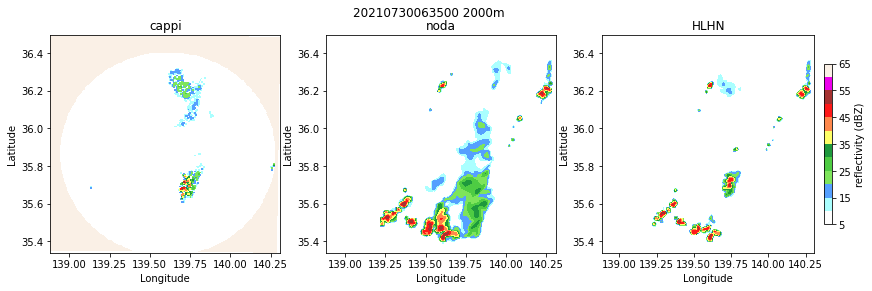

In [41]:
pt = datetime.datetime(2021,7,30,6,35,00)
pt_std = pt.strftime("%Y%m%d%H%M%S")
pt_std2 = pt.strftime("%Y-%m-%d_%H:%M:%S")

cappi = nc.Dataset('/public/home/huozhaoyang/research/jp_pawr/data/cappi/data_d04/2021073006/cappi_d04_dbz_'+pt_std+'.nc')
noda = nc.Dataset('/public/home/huozhaoyang/research/jp_pawr/DAtest/WRF_F_RDA/exp_noda/wrfout_d04_'+pt_std2)
exp1 = nc.Dataset('/public/home/huozhaoyang/research/jp_pawr/DAtest/WRF_F_RDA/wrfout_d04_'+pt_std2)


lat = wrf.getvar(noda, "XLAT",meta=False)
lon = wrf.getvar(noda, "XLONG",meta=False)
dbz_cappi = np.array(cappi['dbz'])
mask = np.where(dbz_cappi == -999, 1, 0)
dbz_cappi[ mask == 1 ] = 99
hgt_cappi = cappi['lev']
print('cappi lev: ',np.array(hgt_cappi))

dbz_noda  = wrf.getvar(noda, 'dbz')
dbz_exp1  = wrf.getvar(exp1, 'dbz')

#dbz
grid_hgt = wrf.getvar(noda,"height")
LEV=3
dbz_cappi = np.copy(dbz_cappi[0,LEV,:,:])
dbz_noda = wrf.interplevel(dbz_noda,grid_hgt, [np.array(hgt_cappi)[LEV]])
dbz_exp1 = wrf.interplevel(dbz_exp1,grid_hgt, [np.array(hgt_cappi)[LEV]])

#mdbz
# dbz_cappi = np.amax(dbz_cappi, axis=0)
# dbz_cappi = np.amax(dbz_cappi, axis=0)
# dbz_noda = np.amax(dbz_noda, axis=0)
# dbz_exp1 = np.amax(dbz_exp1, axis=0)

cmap=cmaps.prcp_1
levels= matplotlib.ticker.MaxNLocator(nbins=12).tick_values(5,65)
norm = matplotlib.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
shadow = ax1.pcolormesh(lon, lat, dbz_cappi, cmap=cmap, norm=norm)#, transform=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
# ax1.set_xlim(138.9, 140.3)
# ax1.set_ylim(35.3, 36.4)
ax1.set_title('cappi')

ax2.pcolormesh(lon, lat, dbz_noda, cmap=cmap, norm=norm)#, transform=ccrs.PlateCarree())
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
# ax2.set_xlim(138.9, 140.3)
# ax2.set_ylim(35.3, 36.4)
ax2.set_title('noda')

ax3.pcolormesh(lon, lat, dbz_exp1, cmap=cmap, norm=norm)#, transform=ccrs.PlateCarree())
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
# ax3.set_xlim(138.9, 140.3)
# ax3.set_ylim(35.3, 36.4)
ax3.set_title('HLHN')

cb = plt.colorbar(shadow, fraction=0.035, pad=0.04)
cb.set_label('reflectivity (dBZ)')

fig.suptitle(str(pt_std)+' '+str(np.array(hgt_cappi)[LEV])+'m')
